In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data/DataSample.csv')

In [2]:
data.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730


In [3]:
data['Latitude'] = data['Latitude'].astype(str)
data['Longitude'] = data['Longitude'].astype(str)

In [4]:
data['geoInfoTS'] = data['Latitude'] + data['Longitude'] + data[' TimeSt']

In [5]:
data=data.drop_duplicates(subset='geoInfoTS', keep="first").drop(columns=['geoInfoTS'])

In [6]:
dataPOI = pd.read_csv('Data/POIList.csv')

In [7]:
dataPOI.head()

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [8]:
dataPOI['POIID'][1] = 'POI1/POI2'
dataPOI=dataPOI.drop([0])
#Since POI1 and POI2 have the exact same coordinates, it doesn't make sense to keep both as it's redundant

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
dataPOI.head()

,POIID,Latitude,Longitude
1,POI1/POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [10]:
dataPOI['point'] = [(x, y) for x,y in zip(dataPOI['Latitude'], dataPOI['Longitude'])]

In [11]:
data['point'] = [(x, y) for x,y in zip(data['Latitude'], data['Longitude'])]

In [12]:
#Gets the geometric distance for each point to its closest POI
from scipy.spatial.distance import cdist
def closest(point, points):
    return points[cdist([point], points).argmin()]

def match(df, col1, x, col2):
    return df[df[col1] == x][col2].values[0]

In [13]:
data['closest'] = [closest(x, list(dataPOI['point'])) for x in data['point']]
data['zone'] = [match(dataPOI, 'point', x, 'POIID') for x in data['closest']]

In [14]:
data12 = data[data['zone']=='POI1/POI2']
data3 = data[data['zone']=='POI3']
data4 = data[data['zone']=='POI4']

In [15]:
import numpy as np
data12['POILong'] = -113.485734
data12['POILat'] = 53.546167
data3['POILong'] = -73.566024
data3['POILat'] = 45.521629
data4['POILong'] = -63.232729
data4['POILat'] = 45.224830

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [16]:
data3.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,point,closest,zone,POILong,POILat
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,"(43.49347, -80.49123)","(45.521629, -73.566024)",POI3,-73.566024,45.521629
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.9399,-81.2709,"(42.9399, -81.2709)","(45.521629, -73.566024)",POI3,-73.566024,45.521629
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.5776,-80.2201,"(43.5776, -80.2201)","(45.521629, -73.566024)",POI3,-73.566024,45.521629
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.3716,-80.9773,"(43.3716, -80.9773)","(45.521629, -73.566024)",POI3,-73.566024,45.521629
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.3716,-80.9773,"(43.3716, -80.9773)","(45.521629, -73.566024)",POI3,-73.566024,45.521629


In [17]:
#Calculating the geometric distance between each point and its closest POI
data12['POILat'] = data12['POILat'].astype(float)
data12['POILong'] = data12['POILong'].astype(float)
data12['Latitude'] = data12['Latitude'].astype(float)
data12['Longitude'] = data12['Longitude'].astype(float)
data12['distance'] = np.sqrt(np.square(data12['Latitude'] - data12['POILat']) + np.square(data12['Longitude'] - data12['POILong']))

data3['POILat'] = data3['POILat'].astype(float)
data3['POILong'] = data3['POILong'].astype(float)
data3['Latitude'] = data3['Latitude'].astype(float)
data3['Longitude'] = data3['Longitude'].astype(float)
data3['distance'] = np.sqrt(np.square(data3['Latitude'] - data3['POILat']) + np.square(data3['Longitude'] - data3['POILong']))

data4['POILat'] = data4['POILat'].astype(float)
data4['POILong'] = data4['POILong'].astype(float)
data4['Latitude'] = data4['Latitude'].astype(float)
data4['Longitude'] = data4['Longitude'].astype(float)
data4['distance'] = np.sqrt(np.square(data4['Latitude'] - data4['POILat']) + np.square(data4['Longitude'] - data4['POILong']))

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [18]:
#Computing the average and maximu distances and variance for each point and its closest POI
import math
average12 = np.average(data12['distance'])
average3 = np.average(data3['distance'])
average4 = np.average(data4['distance'])
std12 = math.sqrt(np.var(data12['distance']))
std3 = math.sqrt(np.var(data3['distance']))
std4 = math.sqrt(np.var(data4['distance']))
max12 = np.max(data12['distance'])
max3 = np.max(data3['distance'])
max4 = np.max(data4['distance'])

In [19]:
print(average12)

3.348183006325603


In [20]:
print(average3)

5.537950830488869


In [21]:
print(average4)

8.810410862715694


In [22]:
print(std12)

3.858290634210257


In [23]:
print(std3)

2.858544126885262


In [24]:
print(std4)

28.645491884351284


In [25]:
import matplotlib.pyplot as plt
(x4,y4) = (data4['Longitude'], data4['Latitude'])
plt.scatter(x4,y4, color='r')
plt.xlim(-63.232729-max4,  -63.232729+max4)
plt.ylim(45.22483-max4, 45.22483+max4)
circle1 = plt.Circle((-63.232729, 45.22483), max4, color='r')
fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.set_xlim((-63.232729-max4, -63.232729+max4))
ax.set_ylim((45.22483-max4, 45.22483+max4))
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

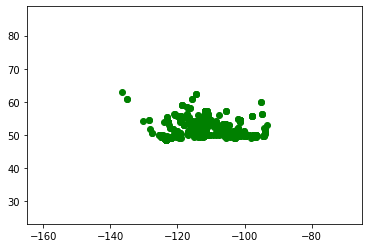

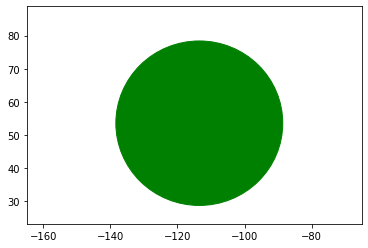

In [26]:
(x12,y12) = (data12['Longitude'], data12['Latitude'])
plt.scatter(x12,y12, color='g')
plt.xlim(-140-max12, -90+max12)
plt.ylim(48-max12, 64+max12)
circle1 = plt.Circle((-113.485734, 53.546167), max12, color='g')
fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.set_xlim((-140-max12, -90+max12))
ax.set_ylim((48-max12, 64+max12))
plt.show()

In [27]:
print (max4,max12,max3)

192.7049913074258 24.851937229893878 20.155377791591437


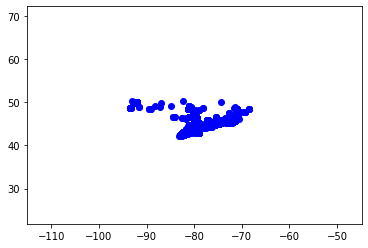

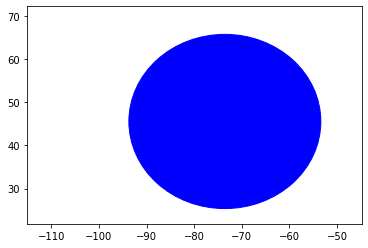

In [28]:
(x3,y3) = (data3['Longitude'], data3['Latitude'])
plt.scatter(x3,y3, color='b')
plt.xlim(-95-max3,  -65+max3)
plt.ylim(42-max3, 52+max3)
circle1 = plt.Circle((-73.566024, 45.521629), max3, color='b')
fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.set_xlim((-95-max3, -65+max3))
ax.set_ylim((42-max3, 52+max3))
plt.show()

In [29]:
print (data12.count, data3.count, data4.count)

<bound method DataFrame.count of            _ID                   TimeSt Country Province       City  Latitude  \
172    4525101  2017-06-21 09:00:07.253      CA       SK  Saskatoon  52.12250   
179    4525479  2017-06-21 10:00:14.537      CA       AB   Edmonton  53.42688   
180    4525558  2017-06-21 14:00:18.667      CA       SK  Saskatoon  52.12250   
181    4525589  2017-06-21 07:00:20.893      CA       AB    Calgary  51.14140   
182    4525612  2017-06-21 08:00:20.943      CA       AB   Edmonton  53.58700   
...        ...                      ...     ...      ...        ...       ...   
22012  5614446  2017-06-21 07:22:53.747      CA       AB    Calgary  51.04505   
22014  5614515  2017-06-21 03:22:54.680      CA       AB   Red Deer  52.26940   
22015  5614548  2017-06-21 00:22:57.103      CA       AB   Red Deer  52.26510   
22016  5614566  2017-06-21 08:22:56.953      CA       BC  Vancouver  49.26460   
22019  5614760  2017-06-21 08:23:01.793      CA       AB    Calgary  51.0209

In [30]:
#Calculating the density of data within each dataset
density12 = 9698/(math.pi*max12*max12)
density3 = 9817/(math.pi*max3*max3)
density4 = 484/(math.pi*max4*max4)
print (density12, density3, density4)

4.998179064154918 7.692137385787865 0.004148676408923476


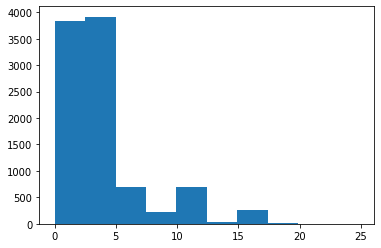

In [31]:
plt.hist(np.hstack(data12['distance']))
plt.show()

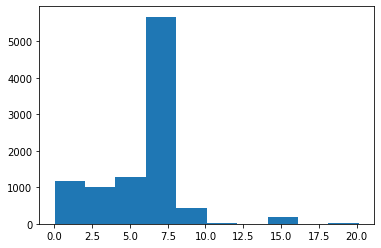

In [32]:
plt.hist(np.hstack(data3['distance']))
plt.show()

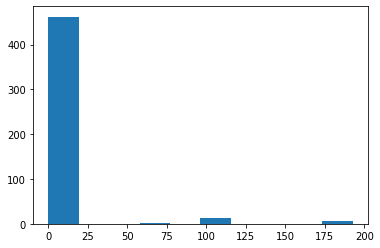

In [33]:
plt.hist(np.hstack(data4['distance']))
plt.show()

In [34]:
#Now let's create a copy of the data and for each data point find its distance to each of the POIs. Remember that since the first 2 POIs have the same coordinates, we'll be treating them as a single entity
dataCopy = data.drop(columns=['point', 'closest', 'zone'])
dataCopy['Latitude'] = data['Latitude'].astype(float)
dataCopy['Longitude'] = data['Longitude'].astype(float)
dataCopy['distanceFromPOI12'] = np.sqrt(np.square(dataCopy['Latitude']-53.546167) + np.square(dataCopy['Longitude']+113.485734))
dataCopy['distanceFromPOI3'] = np.sqrt(np.square(dataCopy['Latitude']-45.521629) + np.square(dataCopy['Longitude']+73.566024))
dataCopy['distanceFromPOI4'] = np.sqrt(np.square(dataCopy['Latitude']-45.224830) + np.square(dataCopy['Longitude']+63.232729))

In [35]:
dataCopy.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,distanceFromPOI12,distanceFromPOI3,distanceFromPOI4
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,34.491941,7.216087,17.345128
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,33.915902,8.125912,18.182313
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,34.727147,6.932242,17.067048
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,34.063472,7.716841,17.841084
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,34.063472,7.716841,17.841084
